# Data Science Pilpeline: pandas, seaborn, scikit-learn

## Linear Regression

Reference: https://youtu.be/3ZWuPVWq7p4?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A

### Agenda

* How do i use **Panda library** to read data from Python?
* How do i use **Seaborn Library** to vizualize data?
* What is **linear regression** and how does it work?
* How do i **train and interpret** an linear regression model in sci-kit learn?
* What are some **evalution metrics** for regression problems?
* How do i choose **which feature to include** in my model?

### Types of Supervised Model

* **Classification:** Predict Categorical response.
* **Regression:** Predict continuous response.

## Reading data from Pandas

**Pandas:** popular Python library for data exploration, manipulation and analysis.


In [1]:
#Conventiona way to import panda

import pandas as pd

#Read the csv file and save the result
data=pd.read_csv("Advertising.csv",index_col=0)

# print first 5 records
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
#print last 5 records
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)


* Default index is sequential number starting from 0 showed on left side of the table

What are features?

* Below are the list of features
    * TV: Advertising spent on tv dollars for a single product in thousands of rupees
    * Radio: Advertising spent on Radio
    * NewsPaper: Advertising Spent on Newspaper

* What are Response?
    * Sales: 1000 of units

### Vizualization using Seaborn library

** Seaborn:** Python Library for statstical data vizualization built on matplotlib

In [5]:
#Conventional way to import Seaborn library

import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline    

### Ploting least Square Line

Let's plot the least squares line from sales versus each of the features

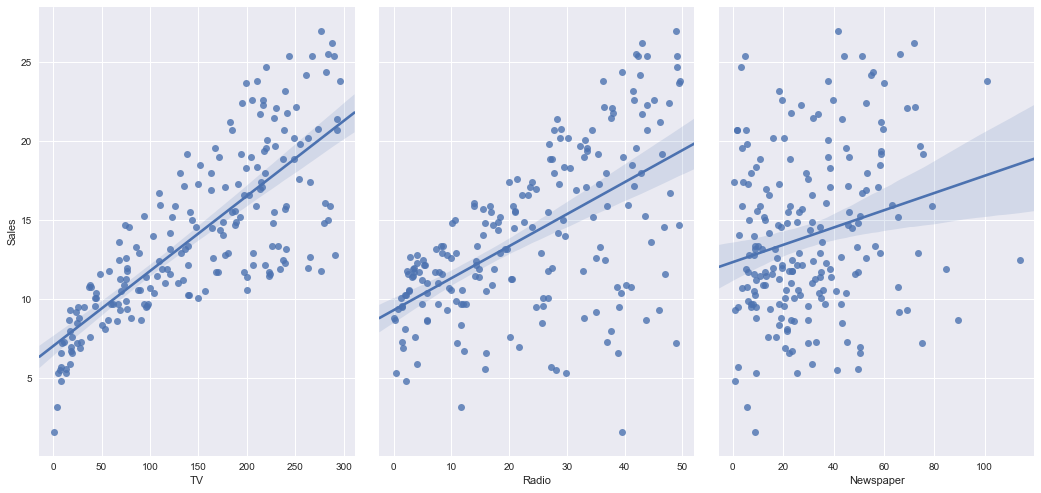

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=.7,kind='reg')

### Confidence in our Model.

**Question:** Is linear Regression a high variance/low bias model or low variance/high bias model.

**Answer:** Low Variance/high bias. Under repeated sampling the line will stay in same place(low variance) but the avergae of those model won't do a great job capturing the true relationship(high bias). Note that low variance is a useful Characteristics when you don't have a lot of training data!!

A closely related concept is **Confidence Intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "True" co-efficient

## Linear Regression 

**Pros:** Fast, no tuning is required, highly interpretable and well-understood
**Cons:** Unlikely to produce best predictive accuracy(Presumes linear relationship between features and response)

### Form of a linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 .... + \beta_nx_n$

- $y$ is the response,
- $\beta_0$ is the intercept,
- $\beta_1$ is the coefficient for $x_1$ (the first feature),
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)


In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


$\beta$ are called **Model Co-efficient**. These values are learned during model fitting step Using **least squared** criteria.

Linear regression tries to find the best fit data.



#### Preparing X and Y using pandas

* Scikit-learn expects X features (to be matrix) and Y response (to be Vector) to be Numpy arrays
* However Pandas are built on top of Numpy
* Thus, X can be pandas data frame and Y canbe pandas series

In [7]:
#Create Feature
feature_cols = ['TV','Radio','Newspaper']
X= data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
#create Response(
Y = data['Sales']
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and Y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=1)

In [12]:
# Default split is 75% training and 25% testing

print(xtrain.shape)

print(xtest.shape)

print(ytrain.shape)

print(ytest.shape)

(150, 3)
(50, 3)
(150,)
(50,)


### Linear Regression using Scikit-learn

In [13]:
# 1. Import the Model

from sklearn.linear_model import LinearRegression

#instantiate the model
linreg = LinearRegression()

#fit the model with training data
linreg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Interpreting Model Co-efficient

In [14]:
# print the intercept and Co-efficient

print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [15]:
# pair the feature names with the co-efficients.
list(zip(feature_cols,linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

$y = 2.88 + .0466 \times TV + .179 \times Radio + .00345 \times Newspapers$

How do we interprete the TV co-efficent(.0466)?

* For a given amount of Radio and Newspaper ad spending a "Unit" increase in TV ad spending is associated with a .0466 "Unit" increase in sales.
* or More clearly: for a given amount of Radio and Newspaer ad spending **an additional ₹1000 spent on TV ads** is assoicated with an **increase in sales of 46.6 items**

Important Notes:

* This is an statement of **association**, not **causation**
* If increase in TV ad spending was associated with ** a decrease** in sales, $\beta_1$ would be negative(-ve)

 

###  Making Prediction

In [16]:
# Make Prediction on testing set

ypred = linreg.predict(xtest) 

We need **Evaluation Metrics** in order to compare our prediction with actual values

### Model Evaluation metrics for regression

Evaluation metrics for problems, such as **accuracy** are not useful for regression problem. 
Instead, we need evaluation metrics designed for comparing continuous values.

Let's creeate some example Number prediction, and calculate **three common evaluation metrics** for regression problems:

In [17]:
#define true and predicted response valuses
true = [100,50,30,20]
pred = [90,50,50,30]

** Mean Absolute Error**(MAE) is the mean absolute value of the erros

$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

In [18]:
from sklearn import metrics

print(metrics.mean_absolute_error(true,pred))

10.0


**Mean Squared Error**(MSE) is the mean of the squared erros:

$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

In [19]:
 print(metrics.mean_squared_error(true,pred))

150.0


**Root mean Squared error**(RMSE) is the sqare root of the mean squared errors:

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

In [20]:
from numpy import sqrt

print(sqrt(metrics.mean_squared_error(true,pred)))

12.2474487139


Comparing these Metrics:

* **MAE** is the easiest to understand because its average error.
* **MSE** is the more polpular than MAE "Punishes" larger error.
*  **RSE** is even more popular than MSE because RMSE is interpreatablel in Y units.

In [21]:
print(sqrt(metrics.mean_squared_error(ytest,ypred)))

1.40465142303


### Feature Selection 

Does **Newspaper** Belong in our modle?, in other words does it improve quality of our prediction.

Let's **remove it** from the model and check RMSE!

In [22]:
#create a python list of feature excluding weak correlated feature with sales

feature_cols=['TV','Radio']

#use the list to select subset of the original Dataframe

X=data[feature_cols]

#select a series from data data from

Y=data['Sales']

#split the data into training and testing set using train_test_split funtion
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=1)

#fit the train data on the training data set
linreg.fit(xtrain,ytrain)

#make prediction on testing feature and save it variable ypred
ypred=linreg.predict(xtest)

#compute the RMSE of our predictions
print(sqrt(metrics.mean_squared_error(ytest,ypred)))

1.38790346994


The RMSE **decreased** when removing  feature Newspaper from the model. 
Error is someting we should minimize, so a **lower number for RMSE is better**

Thus it is unlikely that feature is useful for predicting sales and should be removed from model

### Resources

